# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv(r'database\final-interpolated.csv')
df

,Unnamed: 0,ID,pH,BDecf,pCO2,BE,Apgar1,Apgar5,Gest. Weeks,Weight(g),...,Median_UC,Std_FHR,Std_UC,RMS_FHR,RMS_UC,Peak_to_RMS_FHR,Peak_to_RMS_UC,Peak_FHR,Peak_UC,target
0,0,1220.000000,7.300000,3.520000,6.000000,-4.700000,9.000000,10.000000,42.000000,3100.000000,...,23.000000,55.948729,21.970835,125.822264,33.143752,67.177736,93.856248,193.000000,127.000000,1.0
1,1,1234.000000,7.290000,2.500000,6.500000,-4.200000,8.000000,9.000000,41.000000,3200.000000,...,20.500000,50.734943,24.685834,140.395307,34.975993,83.604693,92.024007,224.000000,127.000000,1.0
2,2,1208.000000,7.230000,5.840000,6.600000,-7.400000,9.000000,9.000000,40.000000,3900.000000,...,3.000000,50.552578,21.705502,111.052168,26.323443,63.447832,73.676557,174.500000,100.000000,1.0
3,3,1038.000000,7.330000,2.720000,5.700000,-4.000000,10.000000,10.000000,39.000000,2740.000000,...,6.000000,24.087743,30.393657,136.057873,37.570082,30.692127,62.429918,166.750000,100.000000,1.0
4,4,1004.000000,7.300000,5.190000,5.500000,-6.400000,8.000000,9.000000,41.000000,3370.000000,...,14.000000,51.581668,16.210997,105.951334,22.315540,123.048666,100.684460,229.000000,123.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,970,1612.415502,7.277141,4.170062,6.214293,-5.257210,8.285658,8.714244,39.571415,4014.282925,...,13.642683,66.832155,15.123756,113.061862,21.790416,87.081041,69.994656,200.142902,91.785073,0.0
971,971,1767.337796,7.293675,3.440918,6.131623,-4.463584,8.947013,9.210260,39.736753,4047.350650,...,15.709416,62.646109,17.396235,103.455788,25.123933,96.149764,74.266717,199.605552,99.390650,0.0
972,972,1481.788323,7.230459,4.115599,7.287158,-5.830279,9.440366,10.000000,40.559634,4038.440290,...,15.922014,64.310246,18.569339,110.321673,26.431828,76.815927,77.513116,187.137600,103.944945,0.0
973,973,1199.005821,7.233021,6.115778,6.434896,-7.374997,6.520836,7.390627,39.130209,3926.041797,...,8.127612,78.002607,9.059652,138.695641,12.894938,62.881180,58.594676,201.576821,71.489613,0.0


In [3]:
# droping unnecessary columns
df.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)

In [4]:
df.isnull().sum().sum()  # checking for null values

0

In [5]:
df

,pH,BDecf,pCO2,BE,Apgar1,Apgar5,Gest. Weeks,Weight(g),Sex,Age,...,Median_UC,Std_FHR,Std_UC,RMS_FHR,RMS_UC,Peak_to_RMS_FHR,Peak_to_RMS_UC,Peak_FHR,Peak_UC,target
0,7.300000,3.520000,6.000000,-4.700000,9.000000,10.000000,42.000000,3100.000000,2.0,34.000000,...,23.000000,55.948729,21.970835,125.822264,33.143752,67.177736,93.856248,193.000000,127.000000,1.0
1,7.290000,2.500000,6.500000,-4.200000,8.000000,9.000000,41.000000,3200.000000,1.0,29.000000,...,20.500000,50.734943,24.685834,140.395307,34.975993,83.604693,92.024007,224.000000,127.000000,1.0
2,7.230000,5.840000,6.600000,-7.400000,9.000000,9.000000,40.000000,3900.000000,2.0,26.000000,...,3.000000,50.552578,21.705502,111.052168,26.323443,63.447832,73.676557,174.500000,100.000000,1.0
3,7.330000,2.720000,5.700000,-4.000000,10.000000,10.000000,39.000000,2740.000000,1.0,24.000000,...,6.000000,24.087743,30.393657,136.057873,37.570082,30.692127,62.429918,166.750000,100.000000,1.0
4,7.300000,5.190000,5.500000,-6.400000,8.000000,9.000000,41.000000,3370.000000,1.0,36.000000,...,14.000000,51.581668,16.210997,105.951334,22.315540,123.048666,100.684460,229.000000,123.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,7.277141,4.170062,6.214293,-5.257210,8.285658,8.714244,39.571415,4014.282925,1.0,29.714146,...,13.642683,66.832155,15.123756,113.061862,21.790416,87.081041,69.994656,200.142902,91.785073,0.0
971,7.293675,3.440918,6.131623,-4.463584,8.947013,9.210260,39.736753,4047.350650,1.0,31.367533,...,15.709416,62.646109,17.396235,103.455788,25.123933,96.149764,74.266717,199.605552,99.390650,0.0
972,7.230459,4.115599,7.287158,-5.830279,9.440366,10.000000,40.559634,4038.440290,1.0,32.880733,...,15.922014,64.310246,18.569339,110.321673,26.431828,76.815927,77.513116,187.137600,103.944945,0.0
973,7.233021,6.115778,6.434896,-7.374997,6.520836,7.390627,39.130209,3926.041797,1.0,25.302090,...,8.127612,78.002607,9.059652,138.695641,12.894938,62.881180,58.594676,201.576821,71.489613,0.0


In [6]:
df.columns

Index(['pH', 'BDecf', 'pCO2', 'BE', 'Apgar1', 'Apgar5', 'Gest. Weeks',
       'Weight(g)', 'Sex', 'Age', 'Gravidity', 'Parity', 'Diabetes',
       'Hypertension', 'Preeclampsia', 'Liq.', 'Pyrexia', 'Meconium',
       'Presentation', 'Induced', 'I.stage', 'NoProgress', 'CK/KP', 'II.stage',
       'Deliv. type', 'dbID', 'Rec. type', 'Pos. II.st.', 'Sig2Birth',
       'Mean_FHR', 'Mean_UC', 'Median_FHR', 'Median_UC', 'Std_FHR', 'Std_UC',
       'RMS_FHR', 'RMS_UC', 'Peak_to_RMS_FHR', 'Peak_to_RMS_UC', 'Peak_FHR',
       'Peak_UC', 'target'],
      dtype='object')

# Feature Engineering

In [7]:
def f(x):
    if 6.5<x<=10:
        return  'Excellent'
    elif 4<x<=6.5:
        return 'ModeratelyAbnormal'
    elif x<=4:
        return 'Attention'

df['Apgar1'] = df['Apgar1'].apply(lambda x: f(x))

In [8]:
df['Apgar5'] = df['Apgar5'].apply(lambda x: f(x))

In [9]:
df.Apgar1.value_counts()

Excellent             901
ModeratelyAbnormal     47
Attention              27
Name: Apgar1, dtype: int64

In [10]:
df.Apgar5.value_counts()

Excellent             957
ModeratelyAbnormal     15
Attention               3
Name: Apgar5, dtype: int64

In [11]:
df.target.value_counts()

1.0    488
0.0    487
Name: target, dtype: int64

In [12]:
df['pH'] = df['pH'].apply(lambda x: 'Pathological' if x<=7.15 else 'Normal')
df

,pH,BDecf,pCO2,BE,Apgar1,Apgar5,Gest. Weeks,Weight(g),Sex,Age,...,Median_UC,Std_FHR,Std_UC,RMS_FHR,RMS_UC,Peak_to_RMS_FHR,Peak_to_RMS_UC,Peak_FHR,Peak_UC,target
0,Normal,3.520000,6.000000,-4.700000,Excellent,Excellent,42.000000,3100.000000,2.0,34.000000,...,23.000000,55.948729,21.970835,125.822264,33.143752,67.177736,93.856248,193.000000,127.000000,1.0
1,Normal,2.500000,6.500000,-4.200000,Excellent,Excellent,41.000000,3200.000000,1.0,29.000000,...,20.500000,50.734943,24.685834,140.395307,34.975993,83.604693,92.024007,224.000000,127.000000,1.0
2,Normal,5.840000,6.600000,-7.400000,Excellent,Excellent,40.000000,3900.000000,2.0,26.000000,...,3.000000,50.552578,21.705502,111.052168,26.323443,63.447832,73.676557,174.500000,100.000000,1.0
3,Normal,2.720000,5.700000,-4.000000,Excellent,Excellent,39.000000,2740.000000,1.0,24.000000,...,6.000000,24.087743,30.393657,136.057873,37.570082,30.692127,62.429918,166.750000,100.000000,1.0
4,Normal,5.190000,5.500000,-6.400000,Excellent,Excellent,41.000000,3370.000000,1.0,36.000000,...,14.000000,51.581668,16.210997,105.951334,22.315540,123.048666,100.684460,229.000000,123.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Normal,4.170062,6.214293,-5.257210,Excellent,Excellent,39.571415,4014.282925,1.0,29.714146,...,13.642683,66.832155,15.123756,113.061862,21.790416,87.081041,69.994656,200.142902,91.785073,0.0
971,Normal,3.440918,6.131623,-4.463584,Excellent,Excellent,39.736753,4047.350650,1.0,31.367533,...,15.709416,62.646109,17.396235,103.455788,25.123933,96.149764,74.266717,199.605552,99.390650,0.0
972,Normal,4.115599,7.287158,-5.830279,Excellent,Excellent,40.559634,4038.440290,1.0,32.880733,...,15.922014,64.310246,18.569339,110.321673,26.431828,76.815927,77.513116,187.137600,103.944945,0.0
973,Normal,6.115778,6.434896,-7.374997,Excellent,Excellent,39.130209,3926.041797,1.0,25.302090,...,8.127612,78.002607,9.059652,138.695641,12.894938,62.881180,58.594676,201.576821,71.489613,0.0


In [13]:
df.pH.value_counts()

Normal          842
Pathological    133
Name: pH, dtype: int64

In [14]:
df.columns

Index(['pH', 'BDecf', 'pCO2', 'BE', 'Apgar1', 'Apgar5', 'Gest. Weeks',
       'Weight(g)', 'Sex', 'Age', 'Gravidity', 'Parity', 'Diabetes',
       'Hypertension', 'Preeclampsia', 'Liq.', 'Pyrexia', 'Meconium',
       'Presentation', 'Induced', 'I.stage', 'NoProgress', 'CK/KP', 'II.stage',
       'Deliv. type', 'dbID', 'Rec. type', 'Pos. II.st.', 'Sig2Birth',
       'Mean_FHR', 'Mean_UC', 'Median_FHR', 'Median_UC', 'Std_FHR', 'Std_UC',
       'RMS_FHR', 'RMS_UC', 'Peak_to_RMS_FHR', 'Peak_to_RMS_UC', 'Peak_FHR',
       'Peak_UC', 'target'],
      dtype='object')

In [15]:
pd.get_option("display.max_columns")

20

In [16]:
df

,pH,BDecf,pCO2,BE,Apgar1,Apgar5,Gest. Weeks,Weight(g),Sex,Age,...,Median_UC,Std_FHR,Std_UC,RMS_FHR,RMS_UC,Peak_to_RMS_FHR,Peak_to_RMS_UC,Peak_FHR,Peak_UC,target
0,Normal,3.520000,6.000000,-4.700000,Excellent,Excellent,42.000000,3100.000000,2.0,34.000000,...,23.000000,55.948729,21.970835,125.822264,33.143752,67.177736,93.856248,193.000000,127.000000,1.0
1,Normal,2.500000,6.500000,-4.200000,Excellent,Excellent,41.000000,3200.000000,1.0,29.000000,...,20.500000,50.734943,24.685834,140.395307,34.975993,83.604693,92.024007,224.000000,127.000000,1.0
2,Normal,5.840000,6.600000,-7.400000,Excellent,Excellent,40.000000,3900.000000,2.0,26.000000,...,3.000000,50.552578,21.705502,111.052168,26.323443,63.447832,73.676557,174.500000,100.000000,1.0
3,Normal,2.720000,5.700000,-4.000000,Excellent,Excellent,39.000000,2740.000000,1.0,24.000000,...,6.000000,24.087743,30.393657,136.057873,37.570082,30.692127,62.429918,166.750000,100.000000,1.0
4,Normal,5.190000,5.500000,-6.400000,Excellent,Excellent,41.000000,3370.000000,1.0,36.000000,...,14.000000,51.581668,16.210997,105.951334,22.315540,123.048666,100.684460,229.000000,123.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Normal,4.170062,6.214293,-5.257210,Excellent,Excellent,39.571415,4014.282925,1.0,29.714146,...,13.642683,66.832155,15.123756,113.061862,21.790416,87.081041,69.994656,200.142902,91.785073,0.0
971,Normal,3.440918,6.131623,-4.463584,Excellent,Excellent,39.736753,4047.350650,1.0,31.367533,...,15.709416,62.646109,17.396235,103.455788,25.123933,96.149764,74.266717,199.605552,99.390650,0.0
972,Normal,4.115599,7.287158,-5.830279,Excellent,Excellent,40.559634,4038.440290,1.0,32.880733,...,15.922014,64.310246,18.569339,110.321673,26.431828,76.815927,77.513116,187.137600,103.944945,0.0
973,Normal,6.115778,6.434896,-7.374997,Excellent,Excellent,39.130209,3926.041797,1.0,25.302090,...,8.127612,78.002607,9.059652,138.695641,12.894938,62.881180,58.594676,201.576821,71.489613,0.0


In [17]:
df.shape

(975, 42)

In [18]:
# one hot encoding
dts = pd.get_dummies(df)
dts.head()

,BDecf,pCO2,BE,Gest. Weeks,Weight(g),Sex,Age,Gravidity,Parity,Diabetes,...,Peak_UC,target,pH_Normal,pH_Pathological,Apgar1_Attention,Apgar1_Excellent,Apgar1_ModeratelyAbnormal,Apgar5_Attention,Apgar5_Excellent,Apgar5_ModeratelyAbnormal
0,3.52,6.0,-4.7,42.0,3100.0,2.0,34.0,2.0,2.0,0.0,...,127.0,1.0,1,0,0,1,0,0,1,0
1,2.50,6.5,-4.2,41.0,3200.0,1.0,29.0,1.0,0.0,0.0,...,127.0,1.0,1,0,0,1,0,0,1,0
2,5.84,6.6,-7.4,40.0,3900.0,2.0,26.0,1.0,0.0,0.0,...,100.0,1.0,1,0,0,1,0,0,1,0
3,2.72,5.7,-4.0,39.0,2740.0,1.0,24.0,1.0,1.0,0.0,...,100.0,1.0,1,0,0,1,0,0,1,0
4,5.19,5.5,-6.4,41.0,3370.0,1.0,36.0,1.0,0.0,0.0,...,123.0,1.0,1,0,0,1,0,0,1,0


In [19]:
dts.shape

(975, 47)

In [20]:
dts.columns

Index(['BDecf', 'pCO2', 'BE', 'Gest. Weeks', 'Weight(g)', 'Sex', 'Age',
       'Gravidity', 'Parity', 'Diabetes', 'Hypertension', 'Preeclampsia',
       'Liq.', 'Pyrexia', 'Meconium', 'Presentation', 'Induced', 'I.stage',
       'NoProgress', 'CK/KP', 'II.stage', 'Deliv. type', 'dbID', 'Rec. type',
       'Pos. II.st.', 'Sig2Birth', 'Mean_FHR', 'Mean_UC', 'Median_FHR',
       'Median_UC', 'Std_FHR', 'Std_UC', 'RMS_FHR', 'RMS_UC',
       'Peak_to_RMS_FHR', 'Peak_to_RMS_UC', 'Peak_FHR', 'Peak_UC', 'target',
       'pH_Normal', 'pH_Pathological', 'Apgar1_Attention', 'Apgar1_Excellent',
       'Apgar1_ModeratelyAbnormal', 'Apgar5_Attention', 'Apgar5_Excellent',
       'Apgar5_ModeratelyAbnormal'],
      dtype='object')

#  Creating train and test set

In [21]:
X = dts.drop('target', axis=1)
y = dts['target']

In [22]:
X

,BDecf,pCO2,BE,Gest. Weeks,Weight(g),Sex,Age,Gravidity,Parity,Diabetes,...,Peak_FHR,Peak_UC,pH_Normal,pH_Pathological,Apgar1_Attention,Apgar1_Excellent,Apgar1_ModeratelyAbnormal,Apgar5_Attention,Apgar5_Excellent,Apgar5_ModeratelyAbnormal
0,3.520000,6.000000,-4.700000,42.000000,3100.000000,2.0,34.000000,2.000000,2.000000,0.0,...,193.000000,127.000000,1,0,0,1,0,0,1,0
1,2.500000,6.500000,-4.200000,41.000000,3200.000000,1.0,29.000000,1.000000,0.000000,0.0,...,224.000000,127.000000,1,0,0,1,0,0,1,0
2,5.840000,6.600000,-7.400000,40.000000,3900.000000,2.0,26.000000,1.000000,0.000000,0.0,...,174.500000,100.000000,1,0,0,1,0,0,1,0
3,2.720000,5.700000,-4.000000,39.000000,2740.000000,1.0,24.000000,1.000000,1.000000,0.0,...,166.750000,100.000000,1,0,0,1,0,0,1,0
4,5.190000,5.500000,-6.400000,41.000000,3370.000000,1.0,36.000000,1.000000,0.000000,0.0,...,229.000000,123.000000,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,4.170062,6.214293,-5.257210,39.571415,4014.282925,1.0,29.714146,2.142829,1.142829,0.0,...,200.142902,91.785073,1,0,0,1,0,0,1,0
971,3.440918,6.131623,-4.463584,39.736753,4047.350650,1.0,31.367533,2.473507,1.473507,0.0,...,199.605552,99.390650,1,0,0,1,0,0,1,0
972,4.115599,7.287158,-5.830279,40.559634,4038.440290,1.0,32.880733,2.440366,1.440366,0.0,...,187.137600,103.944945,1,0,0,1,0,0,1,0
973,6.115778,6.434896,-7.374997,39.130209,3926.041797,1.0,25.302090,1.260418,0.260418,0.0,...,201.576821,71.489613,1,0,0,1,0,0,1,0


In [23]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
970    0.0
971    0.0
972    0.0
973    0.0
974    0.0
Name: target, Length: 975, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print('Training dataset len: {}, Test data len: {}'.format(X_train.shape[0], y_test.shape[0]))

Training dataset len: 780, Test data len: 195


# Scaling values

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train.values)

In [26]:
X_test = sc.transform(X_test)

# Model Training

In [27]:
model = XGBClassifier()
model.fit(X_train, y_train)

[13:10:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\AnantGupta\Anaconda3\envs\mainenv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [29]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.38%


In [30]:
print('Confusion matrix :- \n',confusion_matrix(y_test, predictions))
print("Classification Report :- \n",classification_report(y_test, predictions))

Confusion matrix :- 
 [[93  4]
 [ 5 93]]
Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95        97
         1.0       0.96      0.95      0.95        98

    accuracy                           0.95       195
   macro avg       0.95      0.95      0.95       195
weighted avg       0.95      0.95      0.95       195



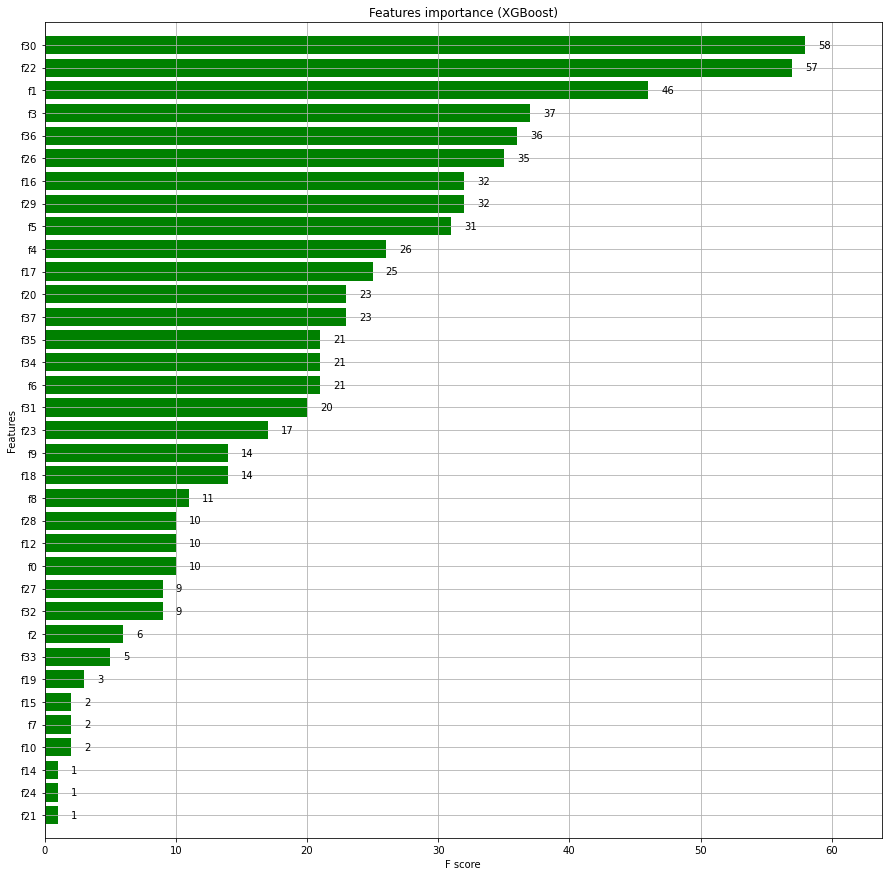

In [31]:
fig, (ax) = plt.subplots(ncols=1, figsize=(15,15))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [32]:
print("Important Features:")
for i in [30,22,1,3,36,26,16,29,5,4]:
    print(dts.columns[i])

Important Features:
Std_FHR
dbID
pCO2
Gest. Weeks
Peak_FHR
Mean_FHR
Induced
Median_UC
Sex
Weight(g)


# OPTIMIZE XGBOOST HYPERPARAMETERS BY PERFORMING GRID SEARCH

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma': [1, 5],   # regularization parameter
              'subsample': [0.8, 1.0], # % of rows taken to build each tree
              'colsample_bytree': [0.8, 1.0], # number of columns used by each tree
              'max_depth': [7, 5], # depth of each tree
              'n_estimators': [100, 300] #no. of trees
             }

xgb_model = xgb.XGBClassifier(objective='binary:logistic', learning_rate = 0.01)
grid = GridSearchCV(xgb_model, 
                    param_grid, 
                    refit = True, 
                    verbose = 4
                   )
grid.fit(X_train, y_train)
print("Best Score: {:.2f} %".format(grid.best_score_ * 100))
print("Best Parameters:", grid.best_params_)

me=   1.4s
[13:12:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\AnantGupta\Anaconda3\envs\mainenv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[CV 3/5] END colsample_bytree=1.0, gamma=5, max_depth=7, n_estimators=300, subsample=1.0; total time=   1.5s
[13:12:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed fr

In [34]:
print("Best Score: {:.2f} %".format(grid.best_score_ * 100))
print("Best Parameters:", grid.best_params_)

Best Score: 93.59 %
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}


In [35]:
grid_model = grid.best_estimator_

pred = grid_model.predict(X_test)

print("Accuracy {:.2f} %".format( 100 * accuracy_score(y_test, pred)))
# Testing Set Performance
print('Confusion matrix :- \n',confusion_matrix(y_test, pred))
print("Classification Report :- \n",classification_report(y_test, pred))

Accuracy 95.38 %
Confusion matrix :- 
 [[93  4]
 [ 5 93]]
Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95        97
         1.0       0.96      0.95      0.95        98

    accuracy                           0.95       195
   macro avg       0.95      0.95      0.95       195
weighted avg       0.95      0.95      0.95       195



# Performing K-fold Cross Validation on XGBoost model

In [38]:
from sklearn.model_selection import cross_val_score
# Hyper parameter tuned model by grid search
accuracies = cross_val_score(estimator = grid_model, X = sc.transform(X), y = y, cv = 10)
print("Accuracies of 10-flod cv:", accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\AnantGupta\Anaconda3\envs\mainenv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[13:15:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\AnantGupta\Anaconda3\envs\mainenv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False w

In [41]:
print("Accuracies of 10-flod cv:", accuracies)
print("Mean Accuracy of 10-folds: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation of 10-folds: {:.2f} %".format(accuracies.std()*100))

Accuracies of 10-flod cv: [0.78571429 0.97959184 0.86734694 0.95918367 0.95918367 0.91752577
 0.94845361 0.92783505 0.96907216 0.97938144]
Mean Accuracy of 10-folds: 92.93 %
Standard Deviation of 10-folds: 5.78 %


In [42]:
accuracies = cross_val_score(estimator = model, X = sc.transform(X), y = y, cv = 10)

C:\Users\AnantGupta\Anaconda3\envs\mainenv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[13:19:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\AnantGupta\Anaconda3\envs\mainenv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False w

In [43]:
print("Accuracies of 10-flod cv:", accuracies)
print("Mean Accuracy of 10-folds: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation of 10-folds: {:.2f} %".format(accuracies.std()*100))

Accuracies of 10-flod cv: [0.7244898  0.98979592 0.93877551 0.94897959 0.97959184 0.97938144
 0.97938144 0.94845361 0.95876289 0.96907216]
Mean Accuracy of 10-folds: 94.17 %
Standard Deviation of 10-folds: 7.41 %
